In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing the packages**

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [41]:
path = '/content/drive/MyDrive/Colab Notebooks/Pattern-Mining/rare event/'

In [42]:
data = pd.read_excel(path + 'TalkFile_processminer-rare-event-mts.xlsx.xlsx')
data.head()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61
0,1999-05-01 00:00:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,...,10.091721,0.053279,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0
1,1999-05-01 00:02:00,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,...,10.095871,0.062801,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,0
2,1999-05-01 00:04:00,0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,...,10.100265,0.072322,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,0
3,1999-05-01 00:06:00,0,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,...,10.104660,0.081600,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,0
4,1999-05-01 00:08:00,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,...,10.109054,0.091121,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,0


**printing out data information**

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18398 entries, 0 to 18397
Data columns (total 63 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    18398 non-null  datetime64[ns]
 1   y       18398 non-null  int64         
 2   x1      18398 non-null  float64       
 3   x2      18398 non-null  float64       
 4   x3      18398 non-null  float64       
 5   x4      18398 non-null  float64       
 6   x5      18398 non-null  float64       
 7   x6      18398 non-null  float64       
 8   x7      18398 non-null  float64       
 9   x8      18398 non-null  float64       
 10  x9      18398 non-null  float64       
 11  x10     18398 non-null  float64       
 12  x11     18398 non-null  float64       
 13  x12     18398 non-null  float64       
 14  x13     18398 non-null  float64       
 15  x14     18398 non-null  float64       
 16  x15     18398 non-null  float64       
 17  x16     18398 non-null  float64       
 18  x17   

**Correlation**

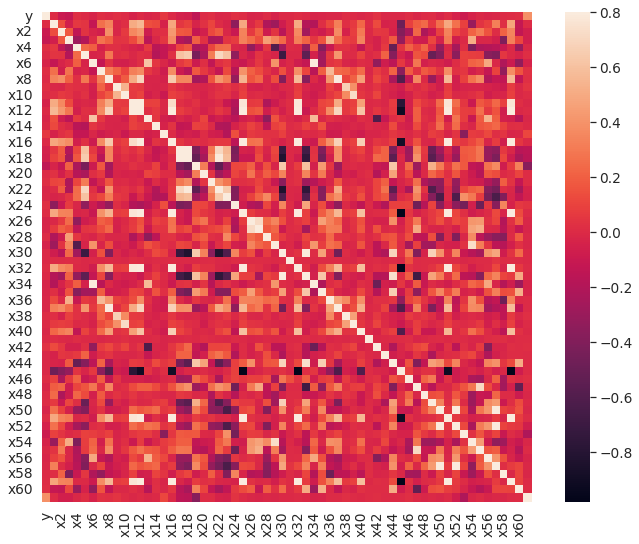

In [44]:
#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

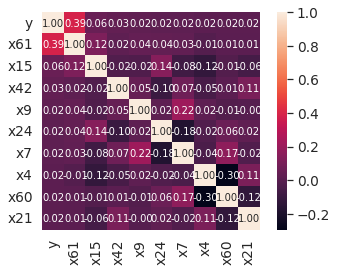

In [45]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'y')['y'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [46]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
time,0,0.0
x46,0,0.0
x33,0,0.0
x34,0,0.0
x35,0,0.0
x36,0,0.0
x37,0,0.0
x38,0,0.0
x39,0,0.0
x40,0,0.0


In [47]:
data[['x28', 'x61']] = data[['x28', 'x61']].astype('category')
data[['y']] = data[['y']].astype('object')

In [48]:
categorical_columns = data[['x28', 'x61']]
continous_columns = data[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x29',
       'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39',
       'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49',
       'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59',
       'x60']]    
output = data[['y']]    

In [49]:
categorical_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18398 entries, 0 to 18397
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   x28     18398 non-null  category
 1   x61     18398 non-null  category
dtypes: category(2)
memory usage: 36.5 KB


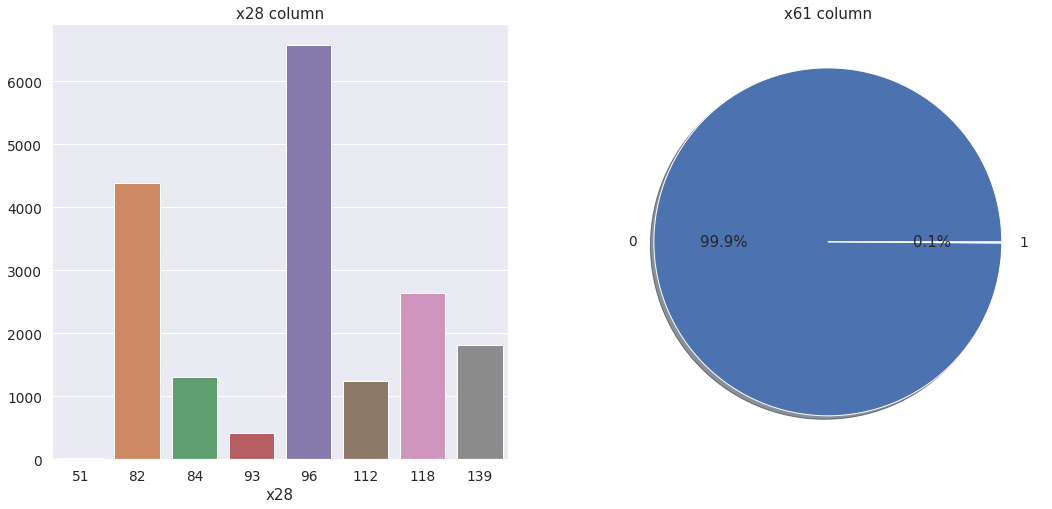

In [50]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.countplot('x28',data=categorical_columns,ax=ax[0])
categorical_columns['x61'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('x28 column')
ax[0].set_ylabel('')
ax[1].set_title('x61 column')
ax[1].set_ylabel('')
plt.show();

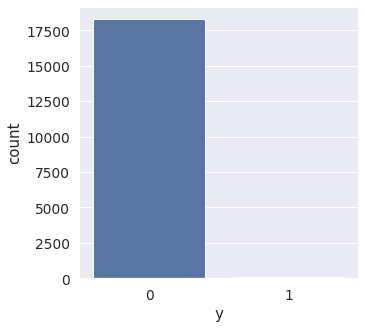

In [51]:
f=plt.subplots(figsize=(5,5))
sns.countplot('y',data=output);

In [52]:
#categorical Columns OneHotEncoder
from sklearn.base import TransformerMixin,BaseEstimator
from sklearn.preprocessing import OneHotEncoder

class My_encoder(BaseEstimator, TransformerMixin):
   
    def __init__(self,drop = 'first',sparse=False):
        self.encoder = OneHotEncoder(drop = drop,sparse = sparse)
        self.features_to_encode = []
        self.columns = []
    
    def fit(self,X_train,features_to_encode):
        data = X_train.copy()
        self.features_to_encode = features_to_encode
        data_to_encode = data[self.features_to_encode]
        self.columns = pd.get_dummies(data_to_encode,drop_first = True).columns
        self.encoder.fit(data_to_encode)
        return self.encoder
    
    def transform(self,X_test):
        data = X_test.copy()
        data.reset_index(drop = True,inplace =True)
        data_to_encode = data[self.features_to_encode]
        data_left = data.drop(self.features_to_encode,axis = 1)
        data_encoded = pd.DataFrame(self.encoder.transform(data_to_encode),columns = self.columns)
        
        return pd.concat([data_left,data_encoded],axis = 1)

In [53]:
features_to_encode = ['x61','x28']
numerical_features=data.drop(features_to_encode,axis=1)


enc = My_encoder()
enc.fit(data,features_to_encode)
df = enc.transform(categorical_columns)
df

,x61_1,x28_82,x28_84,x28_93,x28_96,x28_112,x28_118,x28_139
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
18393,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
18394,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
18395,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
18396,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [54]:
X = pd.concat([df, continous_columns],axis=1, ignore_index=True)
data[['y']] = data[['y']].astype('int')
y = data[['y']]

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=0)

print('number of training data ', X_train.shape)
print('number of testing data ', X_test.shape)
print(y_train.shape, y_test.shape)

number of training data  (13798, 67)
number of testing data  (4600, 67)
(13798, 1) (4600, 1)


**SMOTE**

In [56]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(sampling_strategy=0.1, k_neighbors=8)
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [57]:
print('After Random Over sampling training data')
print(y_train.shape, X_train.shape)

After Random Over sampling training data
(15070, 1) (15070, 67)


In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.model_selection import cross_val_score

def Model(model,name):
    model.fit(X_train,y_train)
    # cross = cross_val_score(model, X, y, cv = 10, n_jobs = -1,scoring = 'accuracy')
    score = model.score(X_test, y_test)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    prediction = model.predict(X_test)
    precison = precision_score(prediction, y_test,average = 'macro')
    recall = recall_score(prediction, y_test,average = 'macro')
    F1_score = 2 * (precison * recall) / (precison + recall)
    
    print('{} Testing Score {}\n'.format(name,model_test_score))
    print('{} Precision Score {}\n'.format(name,precison))
    print('{} Recall Score {}\n'.format(name,recall))
    print('{} F1 Score {}\n'.format(name,F1_score))
    plot_confusion_matrix(model,X_test, y_test, cmap="magma")
    return model

**Random Forrest**

Random forrest Testing Score 0.9980434782608696

Random forrest Precision Score 0.9225303555211732

Random forrest Recall Score 0.9069700577463533

Random forrest F1 Score 0.914684034780211



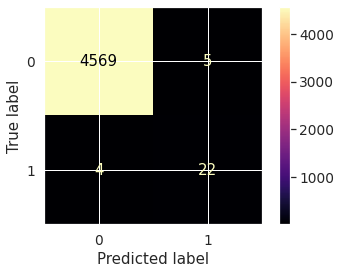

In [59]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
Random_forrest = Model(clf,"Random forrest")

**XGB Classifier**

XGB Classifier Testing Score 0.9960869565217392

XGB Classifier Precision Score 0.8641821667619656

XGB Classifier Recall Score 0.8159008023340627

XGB Classifier F1 Score 0.8393477419787783



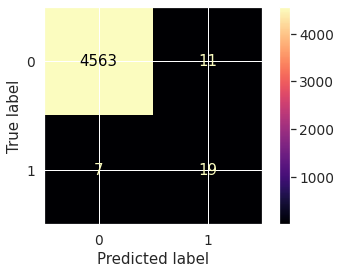

In [60]:
import xgboost as xgb
clf = xgb.XGBClassifier()
xgb = Model(clf,"XGB Classifier")

**AdaBoost Classifier**

Ada boost Classifier Testing Score 0.9936956521739131

Ada boost Classifier Precision Score 0.8056153509804581

Ada boost Classifier Recall Score 0.7274761383195119

Ada boost Classifier F1 Score 0.7645544295204292



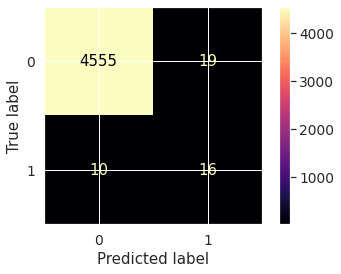

In [61]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
ADA = Model(clf,"Ada boost Classifier")

**ExtraTrees Classifier**

Extra Trees Classifier Testing Score 0.9969565217391304

Extra Trees Classifier Precision Score 0.7307692307692308

Extra Trees Classifier Recall Score 0.9984742807323452

Extra Trees Classifier F1 Score 0.8438999796391278



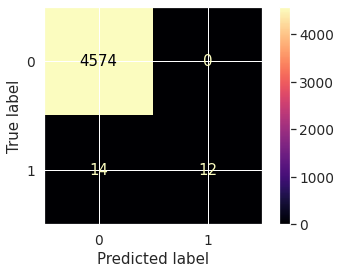

In [62]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=100,random_state=42)
EXT = Model(clf,"Extra Trees Classifier")

**Support Vector Classifier**

Support Vector Classifier Testing Score 0.9943478260869565

Support Vector Classifier Precision Score 0.5

Support Vector Classifier Recall Score 0.49717391304347824

Support Vector Classifier F1 Score 0.4985829518203619



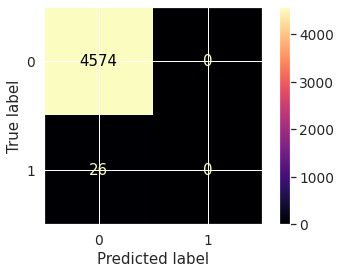

In [63]:
from sklearn.svm import SVC
clf = SVC(random_state=42, C=0.8, kernel= "rbf")
svc = Model(clf,"Support Vector Classifier")

**KNeighbors Classifier**

KNN Classifier Testing Score 0.9943478260869565

KNN Classifier Precision Score 0.5

KNN Classifier Recall Score 0.49717391304347824

KNN Classifier F1 Score 0.4985829518203619



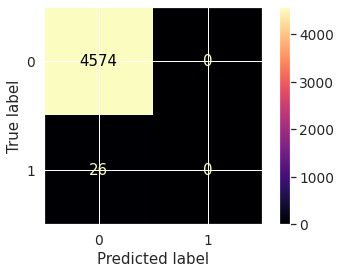

In [64]:
from sklearn.neighbors import KNeighborsClassifier  
cls = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=1 )  
KNN = Model(clf,"KNN Classifier")

**ANN**

In [68]:
import tensorflow
from tensorflow import keras
import keras
from keras.models import Sequential 
from keras.layers import Dense

In [69]:
model = Sequential()
model.add(Dense(64, activation = 'relu', input_dim = 67))
model.add(Dense(28,  activation = 'relu'))
model.add(Dense(14,  activation = 'relu'))
model.add(Dense(6,  activation = 'relu'))
model.add(Dense(1,  activation = 'sigmoid'))
model.summary()
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 32 , epochs = 500)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                4352      
                                                                 
 dense_1 (Dense)             (None, 28)                1820      
                                                                 
 dense_2 (Dense)             (None, 14)                406       
                                                                 
 dense_3 (Dense)             (None, 6)                 90        
                                                                 
 dense_4 (Dense)             (None, 1)                 7         
                                                                 
Total params: 6,675
Trainable params: 6,675
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
471/471 [==============================] -

In [70]:
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)
testing_label_seq_numpy = y_test.to_numpy()
evaluation = model.evaluate(X_test,y_test)
recall = average_precision_score(testing_label_seq_numpy, predictions, average='macro')
precisions = average_precision_score(testing_label_seq_numpy, predictions,  average='macro')
f1_score =  2 * (precisions * recall) / (precisions + recall)
auc_score = roc_auc_score(y_test, y_pred)
df2 = {'Name': 'ANN', 'Accuracy': evaluation[1], 'AUC': auc_score ,'Precision': precisions,'Recall': recall, 'F1 Score':f1_score}
print('loss {}'.format(evaluation[0]))
print('Accuracy {}'.format(evaluation[1]))
print('Precision {}'.format(precisions))
print('Recall {}'.format(recall))
print('f1 score {}'.format(f1_score))
print('AUC score {}'.format(auc_score))


144/144 [==============================] - 0s 2ms/step - loss: 0.1138 - accuracy: 0.9933
loss 0.11377908289432526
Accuracy 0.9932608604431152
Precision 0.5326406262366676
Recall 0.5326406262366676
f1 score 0.5326406262366676
AUC score 0.5


In [ ]:
from sklearn.metrics import *
import xgboost

MLA = {
    'RF'  : RandomForestClassifier(),
    'XGB' : xgboost.XGBClassifier(),
    'ADA' : AdaBoostClassifier(n_estimators=100, random_state=0),
    'EXT' : ExtraTreesClassifier(n_estimators=100,random_state=42),
    'SVC' : SVC(random_state=42),
    'KNN' : KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
}

columns = []
compare = pd.DataFrame(columns = columns)
row_index = 0
for name,alg in MLA.items():
    MLA_name = name
    alg.fit(X_train, y_train)
    predicted = alg.predict(X_test)
    auc_score = roc_auc_score(y_test, predicted)
    micro_averaged_recall = recall_score(y_test, predicted, average = 'macro')
    precisions =precision_score(y_test, predicted, average = 'macro')
    macro_averaged_f1 =  2 * (precisions * micro_averaged_recall) / (precisions + micro_averaged_recall)
    
    compare.loc[row_index, 'Name'] = MLA_name
    compare.loc[row_index, 'Accuracy'] = round(alg.score(X_test, y_test), 4)
    compare.loc[row_index, 'AUC'] = auc_score
    compare.loc[row_index, 'Precision'] = precisions
    compare.loc[row_index, 'Recall'] = micro_averaged_recall
    compare.loc[row_index, 'F1 Score'] = macro_averaged_f1
    row_index+=1


In [71]:
compare = compare.append(df2, ignore_index = True)    
compare.sort_values(by = ['Accuracy'], ascending = False, inplace = True)    
compare

,Name,Accuracy,AUC,Precision,Recall,F1 Score
0,RF,0.998000,0.922530,0.906970,0.922530,0.914684
1,EXT,0.997000,0.730769,0.998474,0.730769,0.843900
2,XGB,0.996100,0.864182,0.815901,0.864182,0.839348
5,SVC,0.994300,0.500000,0.497174,0.500000,0.498583
3,ADA,0.993700,0.805615,0.727476,0.805615,0.764554
6,ANN,0.993261,0.500000,0.532641,0.532641,0.532641
4,KNN,0.979800,0.511797,0.504488,0.511797,0.508116


In [72]:
compare.sort_values(by = ['F1 Score'], ascending = False, inplace = True)    
compare

,Name,Accuracy,AUC,Precision,Recall,F1 Score
0,RF,0.998000,0.922530,0.906970,0.922530,0.914684
1,EXT,0.997000,0.730769,0.998474,0.730769,0.843900
2,XGB,0.996100,0.864182,0.815901,0.864182,0.839348
3,ADA,0.993700,0.805615,0.727476,0.805615,0.764554
6,ANN,0.993261,0.500000,0.532641,0.532641,0.532641
4,KNN,0.979800,0.511797,0.504488,0.511797,0.508116
5,SVC,0.994300,0.500000,0.497174,0.500000,0.498583


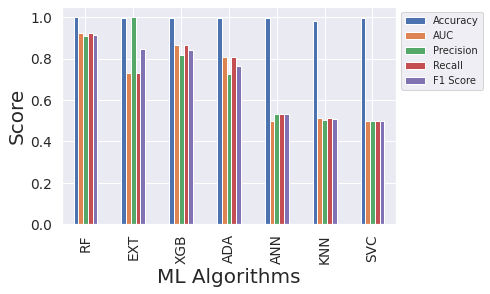

In [73]:
compare.plot(x="Name", y=["Accuracy", "AUC", "Precision", "Recall", "F1 Score"], kind="bar")
plt.xlabel('ML Algorithms',fontsize=20)
plt.ylabel('Score',fontsize=20)
plt.legend(loc = 2, bbox_to_anchor = (1,1),prop={'size': 10})
plt.show()